## Step 1: Convert dataset into 3x3 matrices

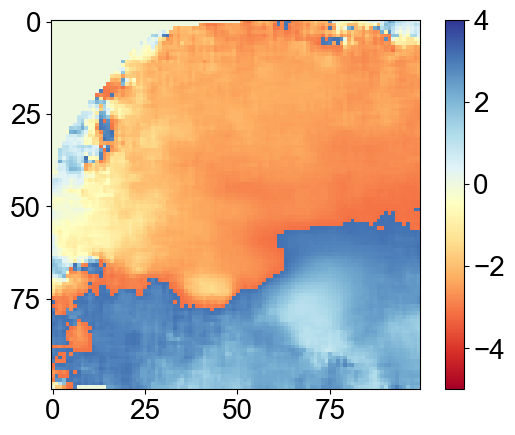

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, font_manager

# Read CSV file
image_array = pd.read_csv('dataset_030_4000.csv', header=None).values

# Replace nan with 0
image_array = np.nan_to_num(image_array)

# Add padding layer for 'same' mode
padded_image = np.pad(image_array, pad_width=1, mode='constant', constant_values=0)

# Extract all 3x3 matrices and save as CSV
sub_matrices = []
for i in range(padded_image.shape[0] - 2):
    for j in range(padded_image.shape[1] - 2):
        sub_matrix = padded_image[i:i+3, j:j+3]
        sub_matrices.append(sub_matrix.flatten())

# Save all sub-matrices to CSV file with 2 decimal places
pd.DataFrame(sub_matrices).round(2).to_csv('all_sub_matrices.csv', index=False)

# Set font to Arial, size 20
font_props = font_manager.FontProperties(family='Arial', size=20)

# Create plot with image data array
fig, ax = plt.subplots()
cax = ax.imshow(image_array, interpolation='nearest', cmap='RdYlBu', vmin=-5, vmax=4)

# Create colorbar
cbar = plt.colorbar(cax)
cbar.ax.yaxis.set_major_locator(ticker.MultipleLocator(2))  # Set colorbar tick interval to 2
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

# Set x and y axis label intervals to 25
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

# Set font size for axes and colorbar
ax.tick_params(axis='both', labelsize=20)  # Set axis label size
cbar.ax.tick_params(labelsize=20)  # Set colorbar label size

# Apply Arial font to axes and colorbar
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_props)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_props)

plt.show()


## Step 2: Edge detection (CNN)

In [2]:
import pandas as pd
import numpy as np

# Define convolution kernel
kernel = np.array([
    [-1,  -1, -1],
    [-1, 8, -1],
    [-1,  -1, -1]
])

# Read all 3x3 sub-matrices
sub_matrices = pd.read_csv('all_sub_matrices.csv').to_numpy()

# Apply convolution kernel
convolved_values = np.array([np.sum(sub_matrix.reshape(3, 3) * kernel) for sub_matrix in sub_matrices])

# Save convolved values to CSV
pd.DataFrame(convolved_values).to_csv('convolved_values.csv', index=False)


In [3]:
import pandas as pd
import numpy as np
from PIL import Image

# Read convolution values
convolved_values = pd.read_csv('convolved_values.csv').to_numpy().flatten()

# Reshape convolution results to match original image size
convolved_image = convolved_values.reshape((100, 100))

# Save reshaped convolution results to CSV
pd.DataFrame(convolved_image).to_csv('convolved_result.csv', index=False)


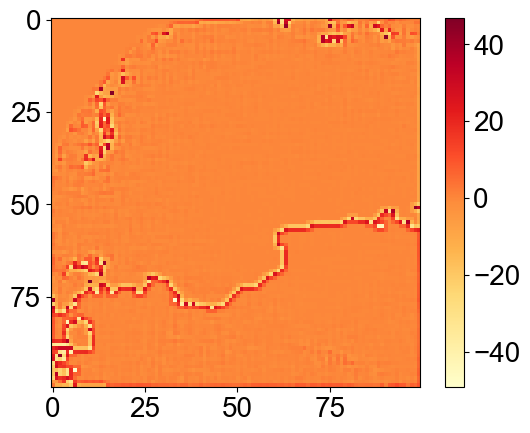

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, font_manager

# Read CSV file
convolved_data = pd.read_csv('convolved_result.csv')

# Set font to Arial, size 20
font_props = font_manager.FontProperties(family='Arial', size=20)

# Create figure and axis objects
fig, ax = plt.subplots()

# Display heatmap
cax = ax.imshow(convolved_data, interpolation='nearest', cmap='YlOrRd')

# Create colorbar
cbar = plt.colorbar(cax)
# cbar.ax.yaxis.set_major_locator(ticker.MultipleLocator(2))  # Set colorbar tick interval to 2
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

# Set x and y axis label display interval to 25
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

# Set font size for axis and colorbar labels
ax.tick_params(axis='both', labelsize=20)
cbar.ax.tick_params(labelsize=20)

# Apply Arial font to axis and colorbar labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_props)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_props)

plt.show()

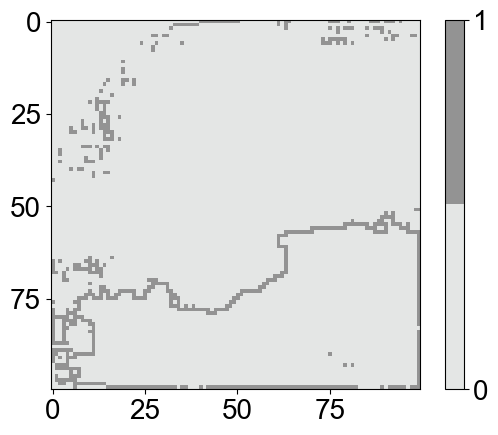

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import colors, ticker, font_manager

# Read CSV file
convolved_data = pd.read_csv('convolved_result.csv')

# Apply threshold conversion
threshold = 4
edge_data = (convolved_data > threshold).astype(int)

# Save converted data
edge_data.to_csv('edge.csv', index=False)



# Use custom colors instead of white and black
cmap = colors.ListedColormap(['#e4e6e5', '#939393'])

# Set font to Arial, size 20
font_props = font_manager.FontProperties(family='Arial', size=20)

# Plot edge detection data
fig, ax = plt.subplots()
cax = ax.imshow(edge_data, cmap=cmap)

# Create colorbar and set specific ticks
cbar = plt.colorbar(cax, ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])  # Set content for colorbar tick labels

# Set x and y axis label intervals to 25
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

# Set font for axis and colorbar
ax.tick_params(axis='both', labelsize=20)  # Set axis label size
cbar.ax.tick_params(labelsize=20)  # Set colorbar label size

# Apply Arial font to axis and colorbar
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_props)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_props)

plt.savefig('edge.jpg', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()
